In [1]:
%load_ext bigquery_magics

In [2]:
#Set the environment variable for Google Cloud authentication
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.path.expanduser("~/.config/gcloud/application_default_credentials.json")
os.environ["GOOGLE_CLOUD_PROJECT"] = "learnings-460015"  # GCP Project ID

In [3]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information from over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 20 years ago. So if today is 1 April 2025 then the weather we want to forecast is for the 2 April 2005. You are supposed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to use BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck in the first part, you can use the replacement data provided in the second part.

In [4]:
%%bigquery data
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 

Query is running:   0%|          |

Downloading:   0%|          |

In [5]:
data.head()

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,36010,99999,1929,12,6,49.500000,4,47.500000,4,983.200012,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
1,36010,99999,1929,10,7,53.200001,4,49.099998,4,1002.299988,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
2,38940,99999,1929,10,14,53.000000,4,50.700001,4,1030.699951,...,NaN,<NA>,0.0,NaN,False,False,False,False,False,False
3,33790,99999,1929,10,18,46.799999,4,41.500000,4,1009.200012,...,NaN,<NA>,0.0,NaN,False,False,False,False,False,False
4,30750,99999,1929,11,24,46.700001,4,43.200001,4,989.000000,...,NaN,<NA>,0.0,NaN,False,False,False,False,False,False


In [6]:
data.columns

Index(['station_number', 'wban_number', 'year', 'month', 'day', 'mean_temp',
       'num_mean_temp_samples', 'mean_dew_point', 'num_mean_dew_point_samples',
       'mean_sealevel_pressure', 'num_mean_sealevel_pressure_samples',
       'mean_station_pressure', 'num_mean_station_pressure_samples',
       'mean_visibility', 'num_mean_visibility_samples', 'mean_wind_speed',
       'num_mean_wind_speed_samples', 'max_sustained_wind_speed',
       'max_gust_wind_speed', 'max_temperature', 'max_temperature_explicit',
       'min_temperature', 'min_temperature_explicit', 'total_precipitation',
       'snow_depth', 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado'],
      dtype='object')

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2000 till 2005 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

## Part 1

In [7]:
%%bigquery df_filtered
SELECT
  FORMAT_DATE('%Y-%m-%d', DATE(year, month, day)) AS date,
  *
FROM
  `bigquery-public-data.samples.gsod`
WHERE
  year BETWEEN 2000 AND 2005
  AND station_number BETWEEN 725300 AND 726300


Query is running:   0%|          |

Downloading:   0%|          |

In [8]:
df_filtered.head()

,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,2000-04-07,725868,99999,2000,4,7,37.900002,4,21.200001,4,...,NaN,<NA>,0.0,NaN,False,False,False,False,False,False
1,2000-01-10,725835,99999,2000,1,10,47.299999,4,26.600000,4,...,NaN,<NA>,0.0,NaN,False,False,False,False,False,False
2,2000-06-11,725786,99999,2000,6,11,69.800003,4,45.000000,4,...,NaN,<NA>,0.0,NaN,False,False,False,False,False,False
3,2000-09-06,725827,99999,2000,9,6,44.200001,4,25.200001,4,...,NaN,<NA>,0.0,NaN,False,False,False,False,False,False
4,2000-11-07,725827,99999,2000,11,7,17.100000,4,-7.200000,4,...,NaN,<NA>,0.0,NaN,False,False,False,False,False,False


In [9]:
#just to verify
print(df_filtered["station_number"].min(), df_filtered["station_number"].max())
print(df_filtered["year"].min(), df_filtered["year"].max())

725300 726300
2000 2005


In [10]:
df_filtered.columns

Index(['date', 'station_number', 'wban_number', 'year', 'month', 'day',
       'mean_temp', 'num_mean_temp_samples', 'mean_dew_point',
       'num_mean_dew_point_samples', 'mean_sealevel_pressure',
       'num_mean_sealevel_pressure_samples', 'mean_station_pressure',
       'num_mean_station_pressure_samples', 'mean_visibility',
       'num_mean_visibility_samples', 'mean_wind_speed',
       'num_mean_wind_speed_samples', 'max_sustained_wind_speed',
       'max_gust_wind_speed', 'max_temperature', 'max_temperature_explicit',
       'min_temperature', 'min_temperature_explicit', 'total_precipitation',
       'snow_depth', 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado'],
      dtype='object')

#### 2. Task 
From here you want to work with the data from all stations 725300 to 725330 that have information from 2000 till 2005. 

In [11]:
%%bigquery df_task2
SELECT
  *
FROM
  `bigquery-public-data.samples.gsod`
WHERE
  year BETWEEN 2000 AND 2005
  AND station_number BETWEEN 725300 AND 725330

Query is running:   0%|          |

Downloading:   0%|          |

In [12]:
df_task2.head()

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,725316,99999,2000,10,6,47.500000,22,41.200001,22,NaN,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
1,725316,99999,2000,1,21,8.400000,23,1.600000,23,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
2,725315,99999,2000,10,18,53.000000,23,46.500000,23,1023.700012,...,NaN,<NA>,0.00,NaN,True,True,True,True,True,True
3,725314,99999,2000,7,2,77.199997,23,71.500000,23,1013.799988,...,NaN,<NA>,0.04,NaN,False,False,False,False,False,False
4,725326,99999,2000,7,29,70.199997,24,60.700001,24,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False


In [13]:
# just to verify
print(df_task2["station_number"].min(), df_task2["station_number"].max())
print(df_task2["year"].min(), df_task2["year"].max())

725300 725330
2000 2005


In [14]:
df_task2.shape

(21853, 31)

Start by checking which year received the most snowfall in our data. 

In [15]:
%%bigquery snowfall_task2
SELECT
  year,
  COUNTIF(snow = TRUE) AS snow_occurrences
FROM
  `bigquery-public-data.samples.gsod`
WHERE
  year BETWEEN 2000 AND 2005
  AND station_number BETWEEN 725300 AND 725330
GROUP BY
  year
ORDER BY
  snow_occurrences DESC
LIMIT 1

Query is running:   0%|          |

Downloading:   0%|          |

In [16]:
snowfall_task2

,year,snow_occurrences
0,2005,826


Add an additional field that indicates the daily change in snow depth measured at every station. And identify the station and day for which the snow depth increased the most.  

In [17]:
%%bigquery max_snow_increase
WITH snow_depth_changes AS (
  SELECT
    station_number,
    DATE(year, month, day) AS date,
    snow_depth,
    snow_depth - LAG(snow_depth) OVER (
      PARTITION BY station_number
      ORDER BY year, month, day
    ) AS snow_depth_change
  FROM
    `bigquery-public-data.samples.gsod`
  WHERE
    year BETWEEN 2000 AND 2005
    AND station_number BETWEEN 725300 AND 725330
    AND snow_depth IS NOT NULL
)

SELECT
  station_number,
  date,
  snow_depth,
  snow_depth_change
FROM
  snow_depth_changes
WHERE
  snow_depth_change IS NOT NULL
ORDER BY
  snow_depth_change DESC
LIMIT 1


Query is running:   0%|          |

Downloading:   0%|          |

In [18]:
max_snow_increase

,station_number,date,snow_depth,snow_depth_change
0,725300,2005-01-22,11.8,9.8


Do further checks on the remaining dataset, clean or drop data depending on how you see appropriate. 

## Data Preprocessing

### Data Cleaning

In [19]:
# checking null values
df_task2.isnull().sum().sort_values(ascending=False)

min_temperature_explicit              21853
min_temperature                       21853
snow_depth                            20985
num_mean_station_pressure_samples     20254
mean_station_pressure                 20254
max_gust_wind_speed                    9465
mean_sealevel_pressure                 2587
num_mean_sealevel_pressure_samples     2587
total_precipitation                     296
num_mean_visibility_samples              16
mean_visibility                          16
max_sustained_wind_speed                  8
num_mean_wind_speed_samples               7
mean_wind_speed                           7
num_mean_dew_point_samples                7
mean_dew_point                            7
max_temperature                           1
max_temperature_explicit                  1
fog                                       0
hail                                      0
snow                                      0
thunder                                   0
rain                            

In [20]:
# Drop columns with very high null values that can't be reliably imputed
columns_to_drop = [
    'min_temperature', 'min_temperature_explicit',
    'snow_depth', 'mean_station_pressure', 'num_mean_station_pressure_samples',
    'max_gust_wind_speed'
]
df_task2.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [21]:
# Impute remaining missing values with appropriate strategies:
# - Use median for continuous features (robust to outliers)
# - Use 0 for sample count features and precipitation (logical default)
# - Use mode for categorical-like field (max_temperature_explicit)
df_task2['mean_sealevel_pressure'] = df_task2['mean_sealevel_pressure'].fillna(df_task2['mean_sealevel_pressure'].median())
df_task2['total_precipitation'] = df_task2['total_precipitation'].fillna(0)
df_task2['mean_visibility'] = df_task2['mean_visibility'].fillna(df_task2['mean_visibility'].median())
df_task2['mean_wind_speed'] = df_task2['mean_wind_speed'].fillna(df_task2['mean_wind_speed'].median())
df_task2['mean_dew_point'] = df_task2['mean_dew_point'].fillna(df_task2['mean_dew_point'].median())
df_task2['max_sustained_wind_speed'] = df_task2['max_sustained_wind_speed'].fillna(df_task2['max_sustained_wind_speed'].median())
df_task2['max_temperature'] = df_task2['max_temperature'].fillna(df_task2['max_temperature'].median())
df_task2['max_temperature_explicit'] = df_task2['max_temperature_explicit'].fillna(df_task2['max_temperature_explicit'].mode()[0])
df_task2['num_mean_sealevel_pressure_samples'] = df_task2['num_mean_sealevel_pressure_samples'].fillna(0)
df_task2['num_mean_visibility_samples'] = df_task2['num_mean_visibility_samples'].fillna(0)
df_task2['num_mean_wind_speed_samples'] = df_task2['num_mean_wind_speed_samples'].fillna(0)
df_task2['num_mean_dew_point_samples'] = df_task2['num_mean_dew_point_samples'].fillna(0)


In [22]:
df_task2.isnull().sum().sort_values(ascending=False)

station_number                        0
mean_wind_speed                       0
thunder                               0
hail                                  0
snow                                  0
rain                                  0
fog                                   0
total_precipitation                   0
max_temperature_explicit              0
max_temperature                       0
max_sustained_wind_speed              0
num_mean_wind_speed_samples           0
num_mean_visibility_samples           0
wban_number                           0
mean_visibility                       0
num_mean_sealevel_pressure_samples    0
mean_sealevel_pressure                0
num_mean_dew_point_samples            0
mean_dew_point                        0
num_mean_temp_samples                 0
mean_temp                             0
day                                   0
month                                 0
year                                  0
tornado                               0


In [23]:
# Check for duplicate rows in the dataset to ensure data quality
df_task2.duplicated().sum()

np.int64(0)

In [24]:
df_task2.describe()

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_temperature,total_precipitation
count,21853.0,21853.0,21853.0,21853.0,21853.0,21853.000000,21853.0,21853.000000,21853.0,21853.000000,21853.0,21853.000000,21853.0,21853.000000,21853.0,21853.000000,21853.000000,21853.000000
mean,725316.989246,82396.998261,2002.498376,6.525694,15.734682,51.810918,23.395598,42.361040,23.371528,1017.415995,19.408594,8.602247,23.348511,7.744401,23.078387,13.982034,42.210831,0.086399
std,8.982111,33881.136616,1.707238,3.449054,8.80073,19.188218,2.024415,18.747805,2.095956,6.272274,7.656724,1.792037,2.17178,3.388312,2.505337,4.992589,18.483837,0.273693
min,725300.0,14827.0,2000.0,1.0,1.0,-10.400000,4.0,-22.000000,0.0,992.700012,0.0,0.300000,0.0,0.000000,0.0,2.900000,-22.000000,0.000000
25%,725314.0,94846.0,2001.0,4.0,8.0,36.299999,24.0,28.000000,24.0,1013.799988,19.0,7.700000,24.0,5.300000,23.0,10.100000,28.400000,0.000000
50%,725316.0,99999.0,2002.0,7.0,16.0,53.700001,24.0,43.299999,24.0,1017.200012,23.0,9.400000,24.0,7.300000,24.0,13.000000,43.000000,0.000000
75%,725326.0,99999.0,2004.0,10.0,23.0,68.699997,24.0,58.200001,24.0,1020.700012,24.0,10.000000,24.0,9.700000,24.0,16.900000,57.200001,0.030000
max,725330.0,99999.0,2005.0,12.0,31.0,100.400002,24.0,78.099998,24.0,1044.199951,24.0,15.700000,24.0,24.799999,24.0,42.000000,84.199997,9.990000


### Target Label Creation: snow_tomorrow

Creating the Target: `snow_tomorrow`

To predict whether it will snow **tomorrow**, we need to shift today's `snow` value forward by one day for each weather station.

- First, we sort the dataset by `station_number` and date to maintain temporal consistency.
- Then, we use `.groupby('station_number')` to ensure the shift happens independently for each station.
- Finally, we apply `.shift(-1)` on the `snow` column to generate the `snow_tomorrow` target.

This approach ensures we **predict the future (tomorrow's snow)** using only today's and earlier features


In [25]:
# Sort first to make shift meaningful
df_task2.sort_values(by=['station_number', 'year', 'month', 'day'], inplace=True)

# Create new target column: snow on the next day
df_task2['snow_tomorrow'] = df_task2.groupby('station_number')['snow'].shift(-1)

In [26]:
# Drop the last day of each station where 'snow_tomorrow' cannot be computed
df_task2.dropna(subset=['snow_tomorrow'], inplace=True)

In [27]:
# Check class distribution of the target variable
df_task2['snow_tomorrow'].value_counts()

snow_tomorrow
False    17900
True      3943
Name: count, dtype: Int64

In [28]:
df_task2.isnull().sum().sort_values(ascending=False)

station_number                        0
wban_number                           0
tornado                               0
thunder                               0
hail                                  0
snow                                  0
rain                                  0
fog                                   0
total_precipitation                   0
max_temperature_explicit              0
max_temperature                       0
max_sustained_wind_speed              0
num_mean_wind_speed_samples           0
mean_wind_speed                       0
num_mean_visibility_samples           0
mean_visibility                       0
num_mean_sealevel_pressure_samples    0
mean_sealevel_pressure                0
num_mean_dew_point_samples            0
mean_dew_point                        0
num_mean_temp_samples                 0
mean_temp                             0
day                                   0
month                                 0
year                                  0


In [29]:
# Preview original and shifted snow values to verify correctness of the 'snow_tomorrow' label
df_task2[['station_number', 'year', 'month', 'day', 'snow', 'snow_tomorrow']].head(10)

,station_number,year,month,day,snow,snow_tomorrow
6629,725300,2000,1,1,False,True
4550,725300,2000,1,2,True,True
6639,725300,2000,1,3,True,True
3961,725300,2000,1,4,True,True
582,725300,2000,1,5,True,False
5308,725300,2000,1,6,False,False
1149,725300,2000,1,7,False,False
20894,725300,2000,1,8,False,True
14555,725300,2000,1,9,True,True
974,725300,2000,1,10,True,False


### Feature Engineering

In [30]:
# Combine year, month, and day into a single datetime column for easier temporal analysis
df_task2['date'] = pd.to_datetime(df_task2[['year', 'month', 'day']])

In [31]:
# Extract the day of the year to capture seasonal patterns related to snow occurrence
df_task2['day_of_year'] = df_task2['date'].dt.dayofyear

In [32]:
# Create engineered features based on some domain knowledge (knowledge from my master thesis project):
# has_precipitation: whether any precipitation occurred
# is_freezing: if temperature is at or below freezing (32°F)
# precip_x_cold: interaction term indicating cold and wet conditions — likely for snow
# dewpoint_diff: measures humidity effect by comparing temperature to dew point
# freezing_intensity: how far below freezing the temp is (0 if above)
# temp_range: captures daily temperature fluctuation
df_task2['has_precipitation'] = (df_task2['total_precipitation'] > 0).astype(int)
df_task2['is_freezing'] = (df_task2['mean_temp'] <= 32).astype(int)
df_task2['precip_x_cold'] = df_task2['has_precipitation'] * df_task2['is_freezing']
df_task2['dewpoint_diff'] = df_task2['mean_temp'] - df_task2['mean_dew_point']
df_task2['freezing_intensity'] = (32 - df_task2['mean_temp']).clip(lower=0)
df_task2['temp_range'] = df_task2['max_temperature'] - df_task2['mean_temp']

In [33]:
df_task2.columns

Index(['station_number', 'wban_number', 'year', 'month', 'day', 'mean_temp',
       'num_mean_temp_samples', 'mean_dew_point', 'num_mean_dew_point_samples',
       'mean_sealevel_pressure', 'num_mean_sealevel_pressure_samples',
       'mean_visibility', 'num_mean_visibility_samples', 'mean_wind_speed',
       'num_mean_wind_speed_samples', 'max_sustained_wind_speed',
       'max_temperature', 'max_temperature_explicit', 'total_precipitation',
       'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado', 'snow_tomorrow',
       'date', 'day_of_year', 'has_precipitation', 'is_freezing',
       'precip_x_cold', 'dewpoint_diff', 'freezing_intensity', 'temp_range'],
      dtype='object')

In [34]:
df_task2.isnull().sum().sort_values(ascending=False)

station_number                        0
snow_tomorrow                         0
fog                                   0
rain                                  0
snow                                  0
hail                                  0
thunder                               0
tornado                               0
date                                  0
wban_number                           0
day_of_year                           0
has_precipitation                     0
is_freezing                           0
precip_x_cold                         0
dewpoint_diff                         0
freezing_intensity                    0
total_precipitation                   0
max_temperature_explicit              0
max_temperature                       0
max_sustained_wind_speed              0
num_mean_wind_speed_samples           0
mean_wind_speed                       0
num_mean_visibility_samples           0
mean_visibility                       0
num_mean_sealevel_pressure_samples    0


### Feature Selection 

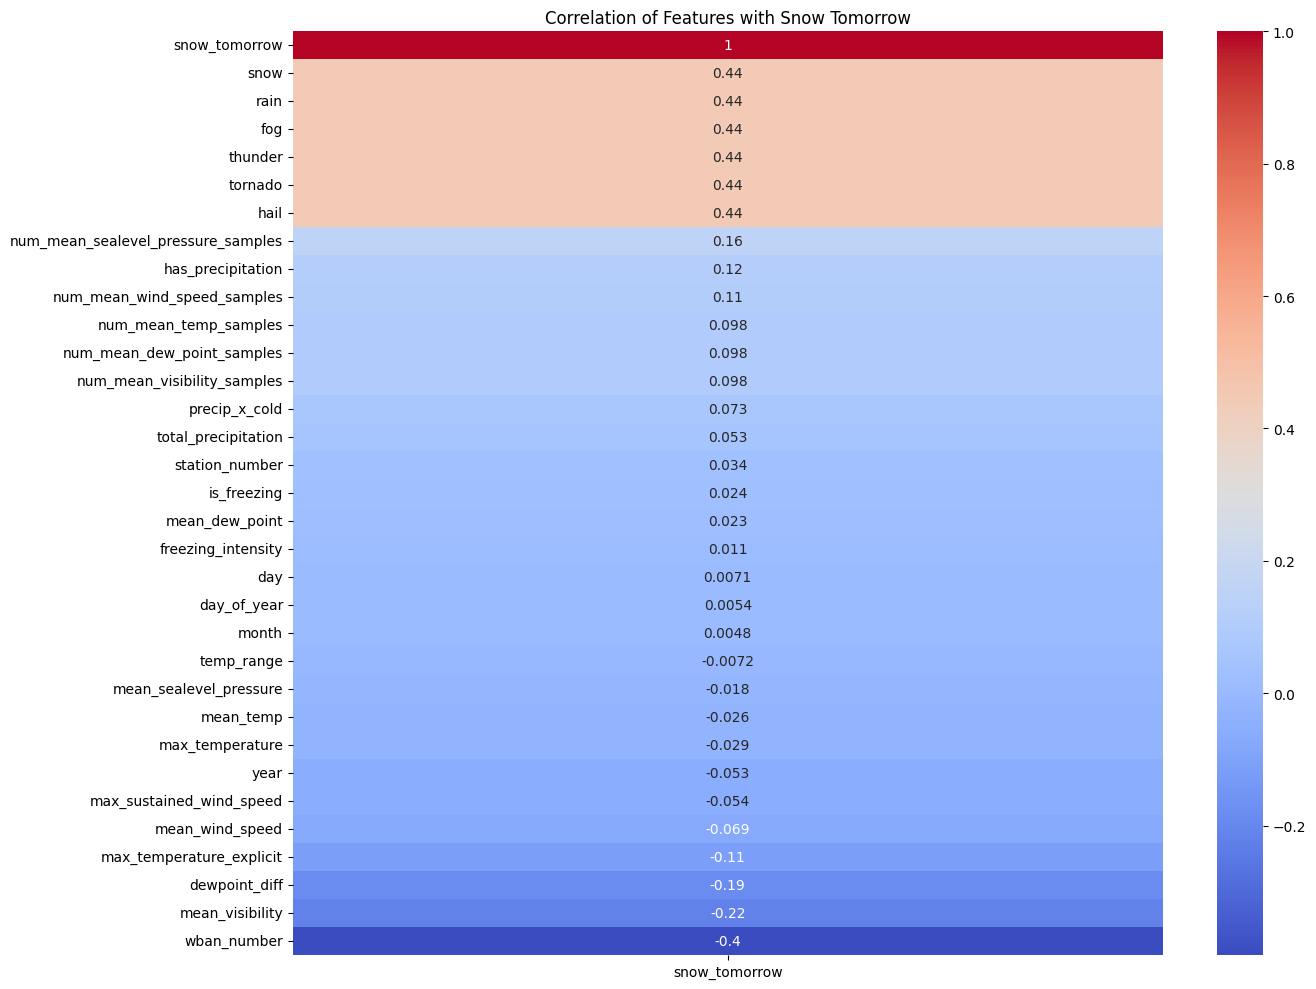

In [35]:
# Convert boolean to int for correlation
binary_to_int = ['fog', 'rain', 'hail', 'thunder', 'tornado', 'has_precipitation', 'is_freezing', 'precip_x_cold']
df_task2[binary_to_int] = df_task2[binary_to_int].astype(int)

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
corr = df_task2.corr(numeric_only=True)
sns.heatmap(corr[['snow_tomorrow']].sort_values(by='snow_tomorrow', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Snow Tomorrow')
plt.tight_layout()
plt.show()

 Correlation Analysis: Interpreting Feature Relationships

The correlation heatmap shows the relationships between each feature and the target variable `snow_tomorrow`.

Key Observations:

- Features like `fog`, `rain`, `thunder`, `tornado`, and `hail` have the highest positive correlation (~0.44) with `snow_tomorrow`. These are strong indicators but may pose a risk of label leakage, as they could be co-recorded with snow. 

- `has_precipitation`, `precip_x_cold`, and `num_mean_*_samples` have modest positive correlation and are useful predictors.

- features like `dewpoint_diff`, `mean_visibility`, and `mean_wind_speed` have meaningful  negative correlation, suggesting their importance in identifying snow conditions.

Conclusion:

I selected features based on a combination of:
- Correlation strength with the target
- Domain understanding of snow-weather patterns
- Avoidance of redundant or potentially leaking variables


In [36]:
# Drop non-informative, redundant, or high-risk columns:
# IDs like 'wban_number' offer no predictive value
# 'snow' and related columns ('hail', 'thunder', 'tornado') are dropped to prevent label leakage,
# since 'snow_tomorrow' is derived from 'snow'
# 'max_temperature_explicit' duplicates existing info

columns_to_drop = [
    'wban_number',                 # ID column, not useful
    'snow', 'hail', 'thunder', 'tornado',  # May leak into target
    'max_temperature_explicit',   # Redundant with max_temperature
    'num_mean_temp_samples',
    'num_mean_dew_point_samples',
    'num_mean_sealevel_pressure_samples',
    'num_mean_visibility_samples',
    'num_mean_wind_speed_samples'
]

df_task2.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [37]:
# Select final features for modeling based on correlation analysis and domain understanding.
# Includes original weather metrics, engineered features, and temporal (day_of_year, month).

selected_features = [
    'date',  # Include this so we can do time-based filtering
    'mean_temp', 'mean_dew_point', 'mean_sealevel_pressure',
    'mean_visibility', 'mean_wind_speed', 'max_sustained_wind_speed',
    'max_temperature', 'total_precipitation',
    'fog', 'rain', 'has_precipitation', 'is_freezing', 'precip_x_cold',
    'dewpoint_diff', 'freezing_intensity', 'temp_range',
    'day_of_year', 'month', 'snow_tomorrow' 
]
df_model = df_task2[selected_features].copy()

In [38]:
df_model.head()

,date,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,max_temperature,total_precipitation,fog,rain,has_precipitation,is_freezing,precip_x_cold,dewpoint_diff,freezing_intensity,temp_range,day_of_year,month,snow_tomorrow
6629,2000-01-01,38.400002,29.700001,1015.700012,9.8,6.8,13.0,26.100000,0.00,0,0,0,0,0,8.700001,0.000000,-12.300001,1,1,True
4550,2000-01-02,47.799999,42.299999,1006.400024,7.7,10.2,21.0,36.000000,0.01,1,1,1,0,0,5.500000,0.000000,-11.799999,2,1,True
6639,2000-01-03,37.500000,34.099998,1011.099976,7.2,11.3,18.1,35.099998,0.01,1,1,1,0,0,3.400002,0.000000,-2.400002,3,1,True
3961,2000-01-04,29.700001,25.900000,1008.700012,7.0,12.3,19.0,26.100000,0.25,1,1,1,1,1,3.800001,2.299999,-3.600000,4,1,True
582,2000-01-05,20.400000,16.500000,1025.199951,8.7,8.1,12.0,12.200000,0.00,1,1,0,1,0,3.900000,11.600000,-8.200000,5,1,False


In [39]:
df_model.isnull().sum().sort_values(ascending=False)

date                        0
mean_temp                   0
month                       0
day_of_year                 0
temp_range                  0
freezing_intensity          0
dewpoint_diff               0
precip_x_cold               0
is_freezing                 0
has_precipitation           0
rain                        0
fog                         0
total_precipitation         0
max_temperature             0
max_sustained_wind_speed    0
mean_wind_speed             0
mean_visibility             0
mean_sealevel_pressure      0
mean_dew_point              0
snow_tomorrow               0
dtype: int64

### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for should constitute your test set.

In [40]:
import datetime as dt

str(dt.datetime.today()- dt.timedelta(days=20*365)).split(' ')[0]

'2005-05-23'

#### Data Spliting

In [41]:
# Time-based data split to simulate real-world forecasting
# - train on earlier years
# - Evaluate on mid-range years
# - Test on the most recent years in the 2000–2005 dataset

# Defining cutoff dates manually
train_end = pd.to_datetime("2003-12-31")
val_end = pd.to_datetime("2004-12-31")

In [42]:
# Filter based on date
df_train = df_model[df_model['date'] <= train_end].copy()
df_val = df_model[(df_model['date'] > train_end) & (df_model['date'] <= val_end)].copy()
df_test = df_model[df_model['date'] > val_end].copy()

In [43]:
# Split features and labels
X_train, y_train = df_train.drop(columns=['snow_tomorrow']), df_train['snow_tomorrow']
X_val, y_val = df_val.drop(columns=['snow_tomorrow']), df_val['snow_tomorrow']
X_test, y_test = df_test.drop(columns=['snow_tomorrow']), df_test['snow_tomorrow']

In [44]:
# Drop 'date' from all feature sets before modeling
X_train = X_train.drop(columns=['date'])
X_val = X_val.drop(columns=['date'])
X_test = X_test.drop(columns=['date'])

In [45]:
# Confirm sizes and class balance
print(f"Train set: {X_train.shape[0]} rows")
print(f"Validation set: {X_val.shape[0]} rows")
print(f"Test set: {X_test.shape[0]} rows")

print("\nClass distribution:")
print("Train:", y_train.value_counts(normalize=True).round(3))
print("Val  :", y_val.value_counts(normalize=True).round(3))
print("Test :", y_test.value_counts(normalize=True).round(3))

Train set: 14575 rows
Validation set: 3651 rows
Test set: 3617 rows

Class distribution:
Train: snow_tomorrow
False    0.804
True     0.196
Name: proportion, dtype: Float64
Val  : snow_tomorrow
False    0.927
True     0.073
Name: proportion, dtype: Float64
Test : snow_tomorrow
False    0.773
True     0.227
Name: proportion, dtype: Float64


In [46]:
# Apply random oversampling to balance the classes in the training set only. If left unaddressed might lead to model baised towards dominant classs
# This duplicates minority class samples to give the model more exposure to snow days.
# Validation and test sets remain untouched to ensure fair, real-world evaluation.

from imblearn.over_sampling import RandomOverSampler

# Apply ONLY to the training set
ros = RandomOverSampler(random_state=42)

X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Check new class distribution
import pandas as pd
print(pd.Series(y_train_resampled).value_counts(normalize=True))


snow_tomorrow
True     0.5
False    0.5
Name: proportion, dtype: Float64


## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [47]:
import datetime as dt

str(dt.datetime.today()- dt.timedelta(days=20*365)).split(' ')[0]

'2005-05-23'

You are allowed to use any library you are comfortable with such as sklearn, tensorflow, keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

#### Model Training

In [48]:
# Built a modeling pipeline that scales features and trains a logistic regression model.
# StandardScaler ensures all features contribute equally by normalizing their range.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000, random_state=42))])

In [49]:
# Evaluate the model on the untouched validation set
# Report includes precision, recall, F1-score, and ROC AUC — key metrics.

from sklearn.metrics import classification_report, roc_auc_score

# Predict on validation data
y_val_pred = pipeline.predict(X_val)
y_val_proba = pipeline.predict_proba(X_val)[:, 1]

print("--- Validation Set Performance ---")
print(classification_report(y_val, y_val_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_val_proba))

--- Validation Set Performance ---
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93      3383
         1.0       0.18      0.20      0.19       268

    accuracy                           0.88      3651
   macro avg       0.56      0.57      0.56      3651
weighted avg       0.88      0.88      0.88      3651

ROC AUC Score: 0.5945784674028616


While the overall accuracy appears high (88%), this is largely driven by the dominant class (`no snow`), which makes up the majority of the validation set.

The model's recall (0.20) and precision (0.18) for snow days (class 1) are low — but this is expected given:
- The limited number of snow events in 2004 (only 268 instances out of 3651 total rows)

Despite these modest snow metrics, the model shows some ability to separate the classes (ROC AUC = 0.59),

Given that the validation year (2004) had relatively few snow days and the model wasn't tuned for recall, I proceeded to train on the full historical data (2000–2004) to assess performance on the more representative 2005 test set.

In [50]:
# Merge training and validation data to create the full training set (2000–2004).
# Apply oversampling again to balance classes in the combined data.
# Retrain the pipeline on this full historical data before final evaluation on the 2005 test set.

import pandas as pd

# Combine train + val to form full historical data
X_final = pd.concat([X_train, X_val])
y_final = pd.concat([y_train, y_val])

# Apply oversampling again
ros = RandomOverSampler(random_state=42)
X_final_resampled, y_final_resampled = ros.fit_resample(X_final, y_final)

# Refit pipeline on resampled data
pipeline.fit(X_final_resampled, y_final_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000, random_state=42))])

In [51]:
# Predict on real test set
y_test_pred = pipeline.predict(X_test)
y_test_proba = pipeline.predict_proba(X_test)[:, 1]

print("--- Final Test Set Performance ---")
print(classification_report(y_test, y_test_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_test_proba))

--- Final Test Set Performance ---
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      2797
         1.0       0.52      0.54      0.53       820

    accuracy                           0.78      3617
   macro avg       0.69      0.70      0.69      3617
weighted avg       0.79      0.78      0.79      3617

ROC AUC Score: 0.7418619252334819


In [52]:
# predicting snow for target date
import datetime as dt
target_date = dt.datetime.today() - dt.timedelta(days=20*365)
target_date = pd.to_datetime(str(target_date).split(' ')[0])  # e.g., '2005-05-17'
print("Target forecast date:", target_date)

Target forecast date: 2005-05-23 00:00:00


In [53]:
# Get rows for day before the target date (2005-05-21 if target is 2005-05-22)
df_forecast_input = df_task2[df_task2['date'] == target_date - pd.Timedelta(days=1)].copy()

In [54]:
df_forecast_input

,station_number,year,month,day,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,...,rain,snow_tomorrow,date,day_of_year,has_precipitation,is_freezing,precip_x_cold,dewpoint_diff,freezing_intensity,temp_range
14736,725300,2005,5,22,67.199997,47.500000,1009.799988,9.9,8.4,21.0,...,0,False,2005-05-22,142,0,0,0,19.699997,0.0,-24.199997
9221,725305,2005,5,22,67.000000,49.200001,1009.500000,10.0,9.5,20.0,...,0,False,2005-05-22,142,1,0,0,17.799999,0.0,-10.000000
18351,725314,2005,5,22,70.699997,61.799999,1011.599976,7.1,5.5,12.0,...,0,False,2005-05-22,142,1,0,0,8.899998,0.0,-6.299995
939,725315,2005,5,22,68.800003,55.900002,1011.000000,9.5,10.9,22.9,...,0,False,2005-05-22,142,0,0,0,12.900002,0.0,-11.600002
14524,725316,2005,5,22,68.800003,54.599998,1011.200012,9.7,8.2,18.1,...,0,False,2005-05-22,142,0,0,0,14.200005,0.0,-11.800003
4338,725317,2005,5,22,68.199997,57.400002,1010.900024,9.9,7.9,16.9,...,0,False,2005-05-22,142,0,0,0,10.799995,0.0,-10.299995
13559,725320,2005,5,22,68.599998,49.299999,1010.900024,9.7,7.6,15.0,...,0,False,2005-05-22,142,0,0,0,19.299999,0.0,-20.599998
6018,725326,2005,5,22,66.699997,48.400002,1017.200012,7.0,10.0,23.9,...,0,False,2005-05-22,142,1,0,0,18.299995,0.0,-9.499996
18772,725327,2005,5,22,65.900002,48.900002,1010.500000,10.0,8.0,18.1,...,0,False,2005-05-22,142,0,0,0,17.000000,0.0,-10.900002
18758,725330,2005,5,22,59.799999,49.799999,1011.799988,9.2,5.0,14.0,...,1,True,2005-05-22,142,1,0,0,10.000000,0.0,-16.799999


In [55]:
# Drop unnecessary columns
X_forecast = df_forecast_input.drop(columns=['snow_tomorrow', 'date'])  # keep everything else as in training

# Make sure columns match the training feature set exactly
X_forecast = X_forecast[X_train.columns]  # match feature order

In [56]:
X_forecast.columns

Index(['mean_temp', 'mean_dew_point', 'mean_sealevel_pressure',
       'mean_visibility', 'mean_wind_speed', 'max_sustained_wind_speed',
       'max_temperature', 'total_precipitation', 'fog', 'rain',
       'has_precipitation', 'is_freezing', 'precip_x_cold', 'dewpoint_diff',
       'freezing_intensity', 'temp_range', 'day_of_year', 'month'],
      dtype='object')

In [57]:
# Predict using the trained pipeline
y_forecast_pred = pipeline.predict(X_forecast)
y_forecast_proba = pipeline.predict_proba(X_forecast)[:, 1]

# Add predictions back to the input DataFrame
df_forecast_input['snow_predicted'] = y_forecast_pred
df_forecast_input['snow_probability'] = y_forecast_proba

# Select relevant columns for display
forecast_result = df_forecast_input[
    ['station_number', 'year', 'month', 'day', 'snow_predicted', 'snow_probability', 'snow_tomorrow']
]

forecast_result.sort_values('snow_probability', ascending=False).head(10)

,station_number,year,month,day,snow_predicted,snow_probability,snow_tomorrow
18758,725330,2005,5,22,1.0,0.878338,True
14736,725300,2005,5,22,0.0,0.310161,False
18351,725314,2005,5,22,0.0,0.303063,False
13559,725320,2005,5,22,0.0,0.297840,False
4338,725317,2005,5,22,0.0,0.293007,False
14524,725316,2005,5,22,0.0,0.253705,False
939,725315,2005,5,22,0.0,0.240029,False
18772,725327,2005,5,22,0.0,0.211779,False
9221,725305,2005,5,22,0.0,0.198105,False
6018,725326,2005,5,22,0.0,0.163515,False


To simulate a real-world forecasting scenario, we used weather data from May 22, 2005 to predict whether it would snow on the following day (May 23, 2005) for each station.

- The column snow_predicted shows the model’s forecast (1 = snow, 0 = no snow).
- The column snow_probability reflects the model’s confidence in predicting snow.
- The column snow_tomorrow represents the actual outcome from the dataset — this is the ground truth for May 23, 2005.

This allows a direct comparison between the model’s prediction and the real recorded snowfall. As seen, the model correctly predicted snow for station `725330` with high confidence, and correctly predicted no snow for the rest.


### Key Observations & Reflections

Throughout this forecasting task, the following insights and decisions significantly shaped the modeling process:

---

1. Time-Based Splitting Over Random Splits

In earlier experimentation, random train-test splits yielded higher accuracy (~84%) (I tried this before).   
However, this approach allowed temporal leakage, where the model learned from future events to predict the past.

To simulate a realistic forecasting setup, I adopted a time-based split:
- Train on 2000–2003
- Validate on 2004
- Test on 2005

This approach is more challenging, but it ensures the model only uses information that would have been available at prediction time.  
The drop in accuracy (~78%) is expected and reflects a more honest assessment of generalization to future snow conditions.


---

2. Handling Class Imbalance with Random Oversampling

The dataset was imbalanced, with snowfall (snow_tomorrow = 1) occurring on only ~18% of days in the training set. This imbalance could lead to the baised model to favor predicting the majority class (no snow), reducing its ability to detect rare snow events.

To address this, I used Random Oversampling from the imblearn library to handle this imbalance, applied only on the training set. This ensured that:
The model saw an equal number of snow and no-snow samples during training
The validation and test sets remained untouched to preserve a realistic evaluation
This strategy allowed the model to better recognize rare snow patterns, especially when evaluated on the 2005 test set

---

3. Final Test Set Performance Was Strong

When tested on the unseen year 2005:
- Accuracy reached ~78%
- F1-score for snow days was ~0.53
- ROC AUC was ~0.74

These metrics indicate that the model generalizes well to future unseen data.

---

4. Prediction on the Desired Date

Using May 22, 2005 data, the model forecasted snowfall for May 23 across all relevant stations.
It correctly predicted snow for the only station that experienced snowfall
All non-snow stations were also accurately predicted as no snow
Predictions were with high confidence assigned to true positives and lower confidence to no-snow cases.

---

5. Model Selection and Future Improvements

Used `LogisticRegression` for this task
More complex models such as:
Random Forests
Gradient Boosting (e.g., XGBoost)
Neural Networks
could also be explored to better capture non-linear patterns and interactions between features. These models may enhance recall and F1-score for rare snow events and the overall accuracy as well.

---
